<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-1-r9.csv?token=AKVFSOBYZC4G6LXFHKRUXSS63I5X4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-11-r9.csv?token=AKVFSOB5GJ644WPZILMYKES63I5X6')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-1-r9.csv?token=AKVFSOFKC5MUKGRYRBP5A3263I5YC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-11-r9.csv?token=AKVFSOHT4LJZBLILXTMUSUC63I5YE')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-1-r9.csv?token=AKVFSODFAXDKEJN3UVWPVN263I5YG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-11-r9.csv?token=AKVFSOHC7DIPJ45FEIXU4WC63I5YK')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-1-r9.csv?token=AKVFSOFZ2WNJL46PEBZEBQS63I5YO')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-11-r9.csv?token=AKVFSOF2ZLFCI6ME5XUSMWK63I5YS')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOHOK4Z2QMGCARXW6C263I5YU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-4-r9.csv?token=AKVFSOEP3BLBVNCYHOPZSXC63I5YY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-6-r9.csv?token=AKVFSODVPMKNCQJDQV2RUAC63I5Y6')
df12 = pd.read_csv('http://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-9-r9.csv?token=AKVFSOH25STVHOUWKX2CRCK63I5ZE')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(60740, 26)
(64099, 26)
(58232, 26)
(62112, 26)
(57998, 26)
(61950, 26)
(110505, 26)
(114054, 26)
(36185, 26)
(33628, 26)
(33707, 26)
(85934, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r9-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r9-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,9,9,23,7,2,3,0,0.000000,4,70,1,70,70,0,8,3,27,1
1,7,2,0,1,1,4,3,9,9,9,23,7,2,3,0,0.000000,4,88,1,88,88,0,8,3,27,0
2,7,2,0,1,1,4,3,9,9,9,23,7,3,3,0,0.000000,4,86,1,86,86,0,12,3,27,0
3,70,0,3,4,1,1,5,17,23,7,9,9,2,3,3,1.000000,16,69,2,70,138,0,8,20,340,1
4,71,0,3,4,2,2,5,17,23,7,9,9,2,3,3,1.000000,17,68,3,70,204,0,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779139,3276936,4,2,6,4,2,3,9,27,11,24,8,30095,3,2,0.666667,33,5,10,14,50,8,1444560,18,162,0
779140,3276943,4,2,6,5,3,3,9,27,11,24,8,30095,3,2,0.666667,40,4,11,14,44,8,2708550,18,162,0
779141,3276944,4,2,2,1,4,3,10,27,11,24,8,30096,3,2,0.666667,40,3,12,14,36,8,240768,6,60,0
779142,3276988,2,4,4,1,1,5,17,24,8,15,15,30096,4,1,0.250000,8,2,13,14,26,8,120384,20,340,0


In [7]:
df.shape

(779144, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-12-r9.csv?token=AKVFSOBOHTVG3MJMJANN6WK63I6C2')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-7-r9.csv?token=AKVFSOB6G5XYPI2M2MYYVWK63I6C4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-12-r9.csv?token=AKVFSOFKWAFM52ARWFNRYAS63I6C6')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-7-r9.csv?token=AKVFSODAQD7CE6W6GUDPTZC63I6DA')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-12-r9.csv?token=AKVFSOFBWSLMJUQVAPKAEX263I6DE')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-7-r9.csv?token=AKVFSOGY6QHT5NN24KL7E7C63I6DI')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-12-r9.csv?token=AKVFSOALONLIOJZTZCXCUTC63I6DM')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-7-r9.csv?token=AKVFSOHCIKUWUJA7HJX3UK263I6DO')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(56360, 26)
(52835, 26)
(53293, 26)
(50604, 26)
(53066, 26)
(50369, 26)
(105301, 26)
(102607, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,132,2,4,4,1,1,5,17,24,8,6,6,4,3,1,0.333333,8,43,1,43,43,8,16,20,340,0
1,133,2,4,4,2,2,5,17,24,8,6,6,4,3,1,0.333333,9,42,2,43,84,8,64,20,340,0
2,134,2,4,4,3,2,5,17,24,8,6,6,4,3,1,0.333333,10,41,3,43,123,8,96,20,340,0
3,135,2,4,4,4,2,5,17,24,8,6,6,4,3,1,0.333333,11,40,4,43,160,8,128,20,340,0
4,139,2,4,4,5,3,5,17,24,8,6,6,4,3,1,0.333333,15,39,5,43,195,8,240,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57993,3265456,4,2,4,1,1,5,17,27,11,0,0,30080,5,2,0.400000,12,5,14,18,70,8,120320,20,340,0
57994,3265458,4,2,4,2,2,5,17,27,11,0,0,30080,5,2,0.400000,14,4,15,18,60,8,481280,20,340,0
57995,3265459,4,2,4,3,2,5,17,27,11,0,0,30080,5,2,0.400000,15,3,16,18,48,8,721920,20,340,0
57996,3265460,4,2,4,4,2,5,17,27,11,0,0,30080,5,2,0.400000,16,2,17,18,34,8,962560,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.384408,0.162525,0.030403,-0.046111,-0.135974,-0.111099,0.039730,0.282002,-0.229235,-0.559488,0.061157,-0.091151,-0.087766,-0.132278,-0.109103,0.586524,0.082376,0.031781,-0.066750,-0.043720
inport,-0.384408,1.000000,-0.203814,0.003061,-0.004649,0.471201,0.383405,0.021422,0.172238,0.384823,0.545313,-0.196724,-0.051262,-0.014621,-0.048709,-0.048515,0.433802,-0.053536,0.197366,0.368669,-0.059902
cache_coherence_type,0.162525,-0.203814,1.000000,0.220725,-0.334722,-0.262567,-0.282445,0.033873,-0.111981,-0.071005,-0.061395,-0.172127,0.030707,-0.029803,0.000668,0.002553,-0.027593,0.296210,0.648448,0.108831,0.001863
flit_id,0.030403,0.003061,0.220725,1.000000,-0.016699,0.208800,0.187382,0.001861,0.043316,0.021871,-0.005883,0.392548,-0.022189,0.023404,0.000898,0.001635,0.032601,0.649959,0.353582,0.290519,-0.000939
flit_type,-0.046111,-0.004649,-0.334722,-0.016699,1.000000,-0.316628,-0.284149,-0.002851,-0.065691,-0.033169,0.008920,0.374663,-0.037502,0.036879,-0.000461,-0.000832,-0.049451,0.141908,-0.536188,-0.440552,0.001433
vnet,-0.135974,0.471201,-0.262567,0.208800,-0.316628,1.000000,0.980009,-0.027451,0.321829,0.164416,0.140167,-0.404300,-0.033499,0.035392,0.001399,-0.004339,0.263840,-0.049918,0.564288,0.925133,0.003858
vc,-0.111099,0.383405,-0.282445,0.187382,-0.284149,0.980009,1.000000,-0.032593,0.280233,0.077483,0.050708,-0.398193,-0.023749,0.049603,0.019114,0.011555,0.208274,-0.063673,0.531509,0.916888,0.010878
traversal_id,0.039730,0.021422,0.033873,0.001861,-0.002851,-0.027451,-0.032593,1.000000,0.011569,0.008166,-0.004508,0.028876,0.123253,0.124211,0.182956,0.126866,0.061196,0.541970,0.007324,-0.018433,-0.265437
hop_count,0.282002,0.172238,-0.111981,0.043316,-0.065691,0.321829,0.280233,0.011569,1.000000,0.560295,0.050760,0.011851,-0.144230,-0.114768,-0.191483,-0.164061,0.515067,-0.026592,0.158093,0.270027,-0.024639
current_hop,-0.229235,0.384823,-0.071005,0.021871,-0.033169,0.164416,0.077483,0.008166,0.560295,1.000000,0.776531,0.248955,-0.079290,-0.097306,-0.130562,-0.109895,0.154938,-0.013916,0.068963,0.098751,-0.008315


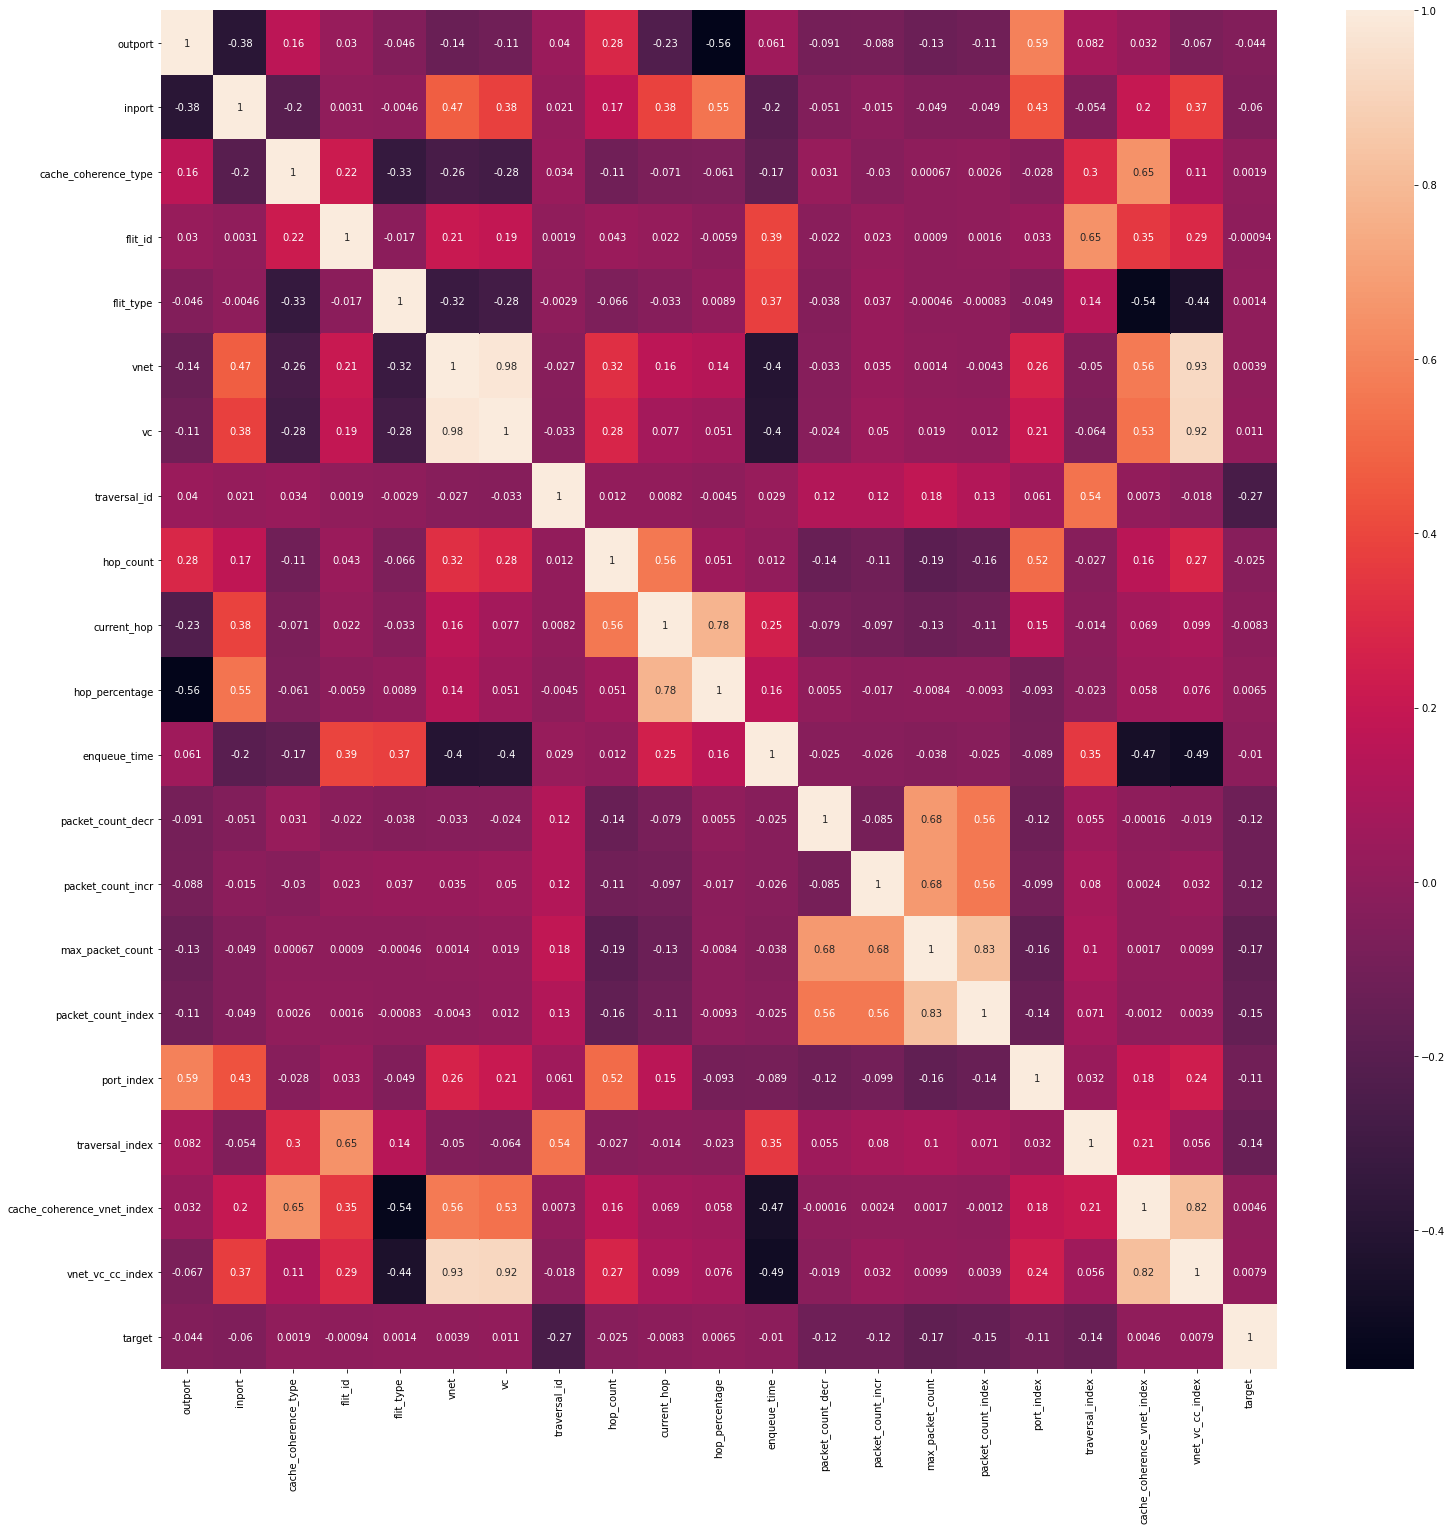

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

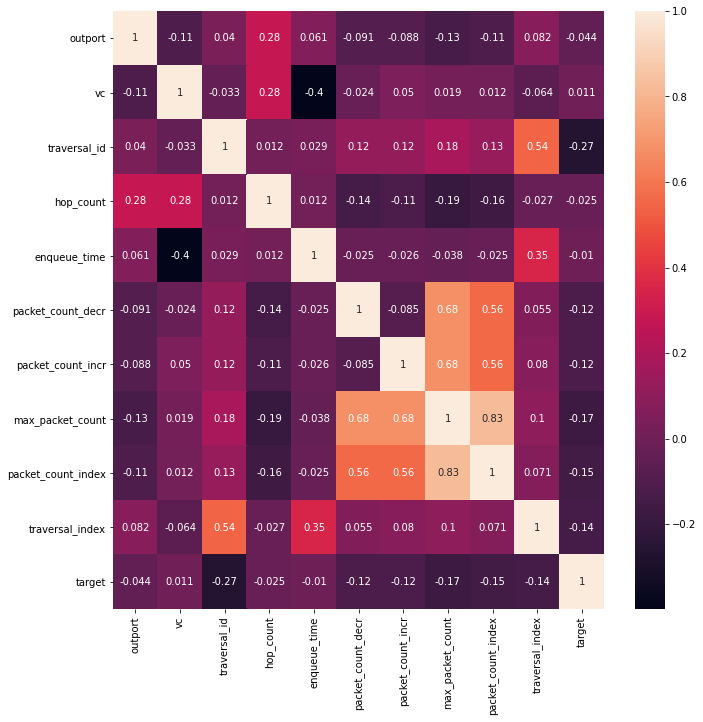

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

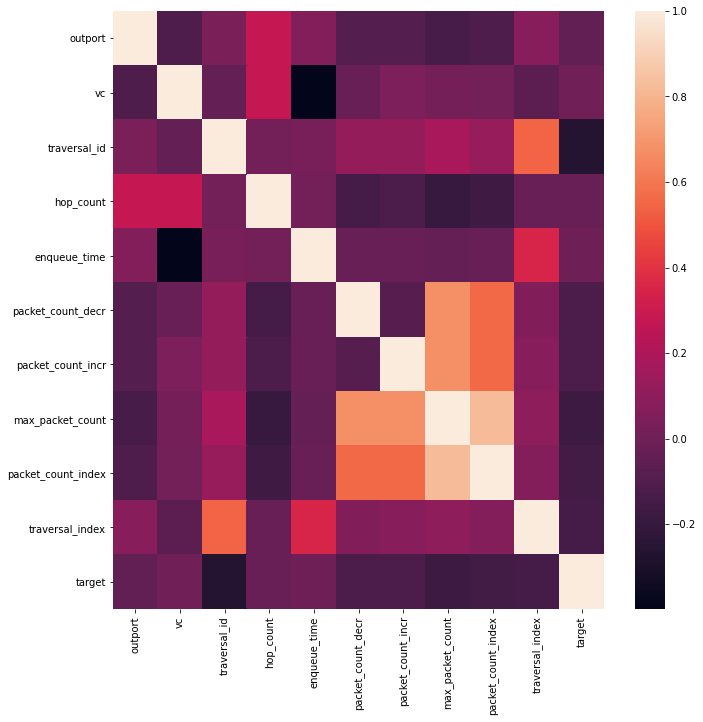

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000000,0.000000,0.6,0.000000,0.372973,0.000000,0.372973,0.007894,0.000000
1,0.5,0.000000,0.000000,0.6,0.000000,0.470270,0.000000,0.470270,0.009953,0.000000
2,0.5,0.000000,0.000033,0.6,0.000000,0.459459,0.000000,0.459459,0.009724,0.000001
3,0.0,0.888889,0.000000,0.6,0.187500,0.367568,0.005405,0.372973,0.015673,0.000000
4,0.0,0.888889,0.000000,0.6,0.203125,0.362162,0.010811,0.372973,0.023224,0.000009
...,...,...,...,...,...,...,...,...,...,...
779139,1.0,0.000000,0.999967,0.6,0.453125,0.021622,0.048649,0.070270,0.005606,0.533332
779140,1.0,0.000000,0.999967,0.6,0.562500,0.016216,0.054054,0.070270,0.004919,1.000000
779141,1.0,0.111111,1.000000,0.6,0.562500,0.010811,0.059459,0.070270,0.004004,0.088889
779142,0.5,0.888889,1.000000,0.8,0.062500,0.005405,0.064865,0.070270,0.002860,0.044443


In [22]:
train_X[train_X.duplicated()].shape

(3267, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.888889,0.000000,0.75,0.065574,0.233333,0.000000,0.233333,0.007527,0.000000
1,0.50,0.888889,0.000000,0.75,0.081967,0.225000,0.008333,0.233333,0.014785,0.000018
2,0.50,0.888889,0.000000,0.75,0.098361,0.216667,0.016667,0.233333,0.021505,0.000030
3,0.50,0.888889,0.000000,0.75,0.114754,0.208333,0.025000,0.233333,0.027688,0.000041
4,0.50,0.888889,0.000000,0.75,0.180328,0.200000,0.033333,0.233333,0.033333,0.000083
...,...,...,...,...,...,...,...,...,...,...
56355,0.75,0.000000,0.999967,1.00,0.311475,0.033333,0.008333,0.041667,0.002419,0.222277
56356,0.75,0.000000,0.999967,1.00,0.426230,0.025000,0.016667,0.041667,0.002957,0.333418
56357,0.75,0.000000,0.999967,1.00,0.540984,0.016667,0.025000,0.041667,0.002957,0.444559
56358,0.75,0.000000,0.999967,1.00,0.655738,0.008333,0.033333,0.041667,0.002419,0.833554


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    589690
1    189454
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  7258.233605
7    max_packet_count  2389.897947
9     traversal_index  2297.954087
8  packet_count_index  2238.423545
6   packet_count_incr  1199.972375
5   packet_count_decr  1189.941331
0             outport   281.509834
3           hop_count    35.822274
1                  vc    32.774697
4        enqueue_time     6.202219


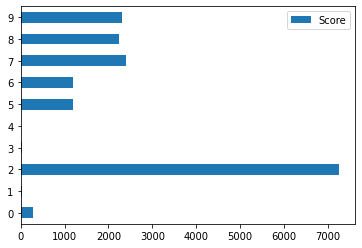

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r9.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.17998925102076
Test Prediction Score 92.49176982461545


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.05393896380413
Test Prediction Score 87.3038705403615
Test Prediction Score 86.45976019364645
Test Prediction Score 86.16314915816932
Test Prediction Score 85.10722496513775
Test Prediction Score 85.04238718259248
Test Prediction Score 87.4787513888757
Test Prediction Score 86.64710984630678


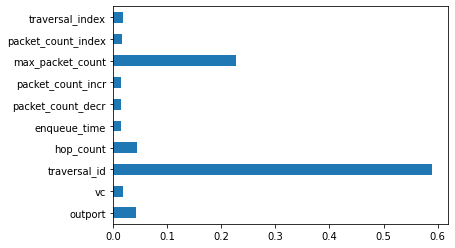

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

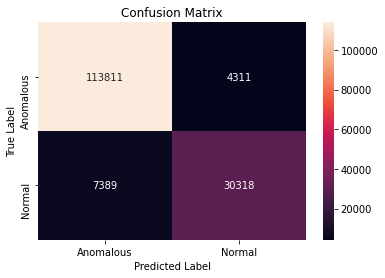

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    118122
           1       0.88      0.80      0.84     37707

    accuracy                           0.92    155829
   macro avg       0.91      0.88      0.89    155829
weighted avg       0.92      0.92      0.92    155829



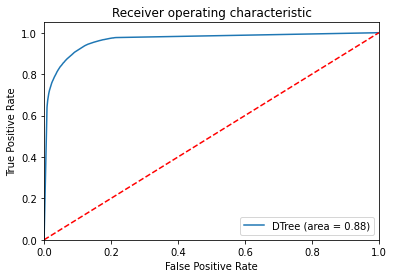

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r9l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99197837369547
Test Prediction Score 99.54758100225247


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.37721788502483
Test Prediction Score 89.60537522475632
Test Prediction Score 89.40010883230443
Test Prediction Score 89.3210022923089
Test Prediction Score 88.10160931669996
Test Prediction Score 87.53995513113225
Test Prediction Score 88.17390148241707
Test Prediction Score 88.69375383745748


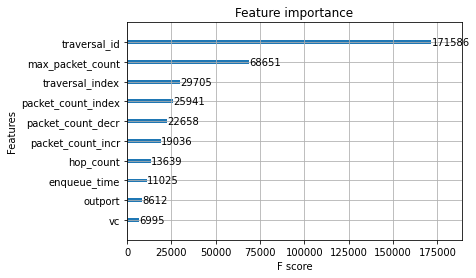

In [52]:
plot_importance(xgbc)
plt.show()

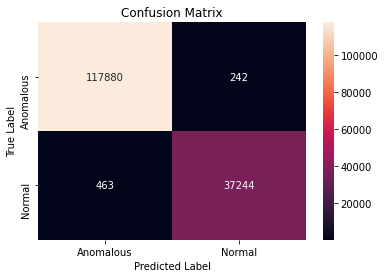

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118122
           1       0.99      0.99      0.99     37707

    accuracy                           1.00    155829
   macro avg       0.99      0.99      0.99    155829
weighted avg       1.00      1.00      1.00    155829



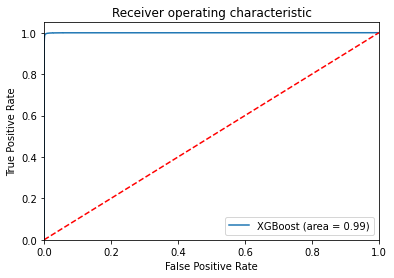

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()